In [ ]:
# this notebook is for creating a predictive model for house price prediction using random forest classifier.
#this is done by 19cse224 Abhishek Singh . the dataset is taken from kaggle.com . 

In [64]:
import warnings
warnings.filterwarnings('ignore')

""" #to ignore unnecessary warnings """

In [123]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline


""" ln1 : #we will use "pandas" (a package ) for data analysis (like any calculations), 
     some data cleaning and data visualization there are so many others too.  
     ln 2 :  we will "numpy ", a data anaylsis package, in the notebook we can used to work with different multi-demsional arrays
      ln 3 :  we will use ""#seaborn" is a data visualization packahe . in the notebook, you will see different plots and specailly 
      used for plots with special relationships
      ln 4 : it can also be wriiten as "from matplotlib import pyplot as mpy" . matplotplib is also a classic data visulaization package . 
      here in the notebook we use a scatter graph from matplotlib
      ln 5 : #mertric module will be used to measure the random forest classifiers model 's performance with outcase dicussed below 
      
      ln 7 : when ever a plot is created it will create/show like a png file for the plot."""

In [124]:
loan_pr = pd.read_csv('train_for_loan_approval.csv')

#reading a csv file (pandas)

In [125]:
loan_pr.head()
#showcasing the csv file 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [126]:
loan_pr.info()
#gaining the information about the csv file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
"""We  can observe there are Null values in the Data which means we need to clean the data or else our model will be defective 
Credit_History and Loan_Amount_Term are Categorical varible we need to change its Data type
Loan_Status is the Target Variables as we need to find if loan will be approved or not 
We can drop the Loan_ID Column as it does not provide any information this will be useless as there will be no signifact pattern helpfull """

In [127]:
dupli=loan_pr.duplicated()
print('Number of duplicate records',dupli.sum())

Number of duplicate records 0


In [ ]:
#we will check if it has duplicate data cause it can also lead to our model be less accurate . but as you can see there no duplicate data

In [128]:
loan_pr['Credit_History']=loan_pr['Credit_History'].astype('object')
loan_pr['Loan_Amount_Term']=loan_pr['Loan_Amount_Term'].astype('object')

# here we will change the datatypes for credit history and loan amount terms to object from numpy.float64 bcoz we will use to anaylze
# so that we can use analyze in yes or no / 0 or 1 form

In [129]:
loan_pr['Dependents']=np.where(loan_pr['Dependents']=='0',0,loan_pr['Dependents'])
loan_pr['Dependents']=np.where(loan_pr['Dependents']=='1',1,loan_pr['Dependents'])
loan_pr['Dependents']=np.where(loan_pr['Dependents']=='2',2,loan_pr['Dependents'])
loan_pr['Dependents']=np.where(loan_pr['Dependents']=='3+',3,loan_pr['Dependents'])

In [ ]:
# naming the dependents into nums so that data anaysis and ploting will be easy .

In [130]:
loan_pr['Dependents']=loan_pr['Dependents'].astype('float64')

In [ ]:
#naming the data type for dependents to numpy.float64

In [131]:
loan_pr.drop(['Loan_ID'],axis=1,inplace=True) 

# we dropped the unneccesary loan_id column 

In [132]:
obj=[]
num=[]
for i in loan_pr.columns:
    if loan_pr[i].dtype=='object':
        obj.append(i)
    else:
        num.append(i)

print(obj)
print(num)

['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [ ]:
""" sperating the numerical parts (int64 & float 64) as num and object part as obj  """

In [133]:
#Looking at unique values
for i in loan_pr[obj]:
    print(i)
    print( loan_pr[i].value_counts())
    print("\n")


Gender
Male      489
Female    112
Name: Gender, dtype: int64


Married
Yes    398
No     213
Name: Married, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64




In [ ]:
#seeing all the overalls numerical prts in the file 

In [134]:
loan_pr[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0


In [ ]:
##seeing all the overalls object  prts in the file

In [135]:
loan_pr[obj].describe().T

,count,unique,top,freq
Gender,601,2,Male,489
Married,611,2,Yes,398
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Loan_Amount_Term,600.0,10.0,360.0,512.0
Credit_History,564.0,2.0,1.0,475.0
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [1]:
# check if there's any null data in numerical parts or object part
#as we can see below yes ther are some null datas in both . we will clean it below

In [136]:
loan_pr[num].isnull().sum()

Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
dtype: int64

In [137]:
loan_pr[obj].isnull().sum()

Gender              13
Married              3
Education            0
Self_Employed       32
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# we will convert the loan status to int 64 and then covert yes and no to 1 and 0 .

In [138]:
loan_pr['Loan_Status']=np.where(loan_pr['Loan_Status']=='Y',1,loan_pr['Loan_Status'])
loan_pr['Loan_Status']=np.where(loan_pr['Loan_Status']=='N',0,loan_pr['Loan_Status'])
loan_pr['Loan_Status']=loan_pr['Loan_Status'].astype('int64')

In [ ]:
#Looking at the data visualizztion part of the dataset

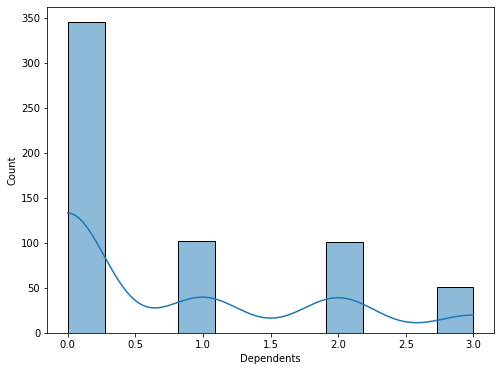

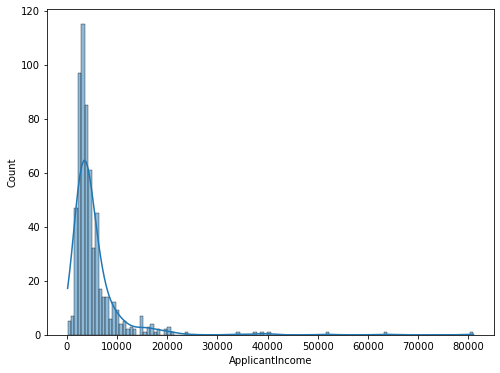

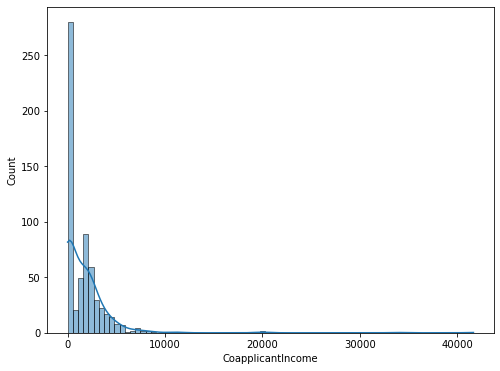

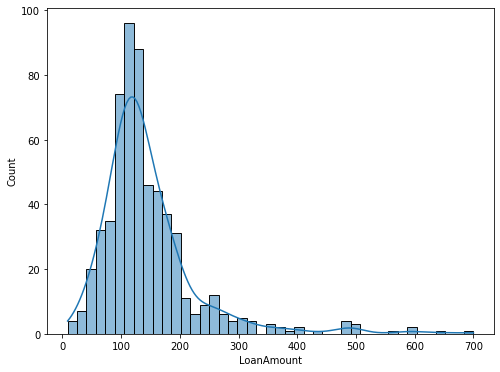

In [139]:
for i in loan_pr[num]:
    plt.figure(figsize=(8,6))
    sb.histplot(loan_pr[i],kde=True)

In [ ]:
#checking the univaritive data (as in answer is 1 0r 0 )

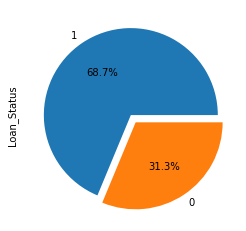

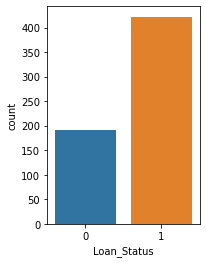

In [140]:
plt.subplot(1,1,1)
loan_pr['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()
plt.subplot(1,2,2)
sb.countplot(loan_pr['Loan_Status'])
plt.show()
#checking the loan status in the form of a pie chart

# as we can see 68.7% of the Loans get approved while 31.3% get rejected

In [ ]:
#checking the gender distribution for loan 

# as we can see #81.4%  are Male .

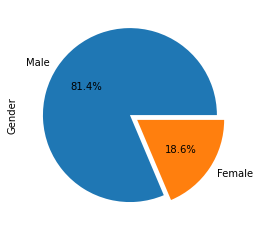

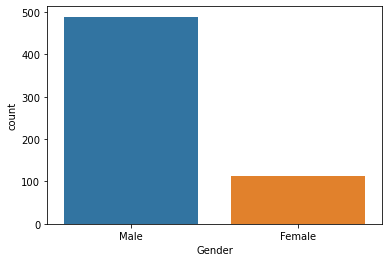

In [141]:
loan_pr['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()
sb.countplot(loan_pr['Gender'])
plt.show()

In [ ]:
#checking the self employed distribution in the data set

##85.9%  are Self_Employed

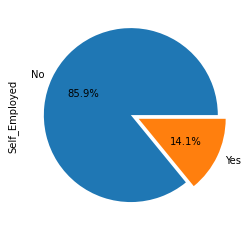

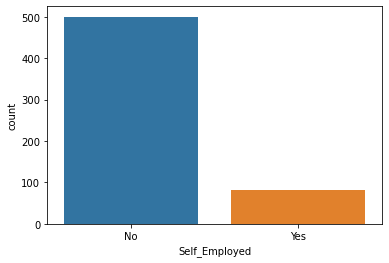

In [142]:
loan_pr['Self_Employed'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()
sb.countplot(loan_pr['Self_Employed'])
plt.show()

In [ ]:
# checking the dependents distribution in the data set

# 57.6%  have no dependnts
# Most of them have no dependents

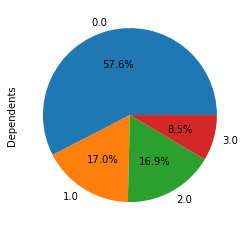

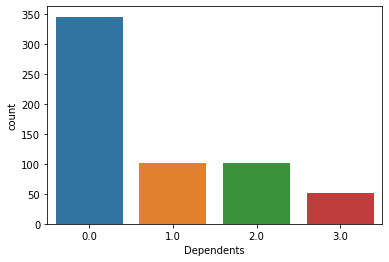

In [143]:
loan_pr['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()
sb.countplot(loan_pr['Dependents'])
plt.show()

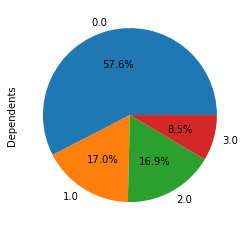

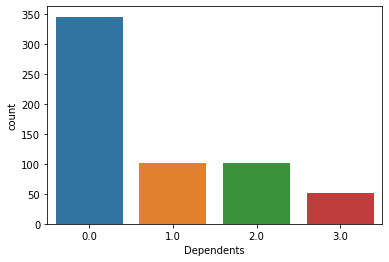

In [144]:
loan_pr['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()
sb.countplot(loan_pr['Dependents'])
plt.show()

In [ ]:
#checking the people from educational background ditribution int the data set

#78.2%  are Graduates which means educated

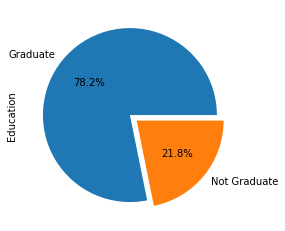

<AxesSubplot:xlabel='Education', ylabel='count'>

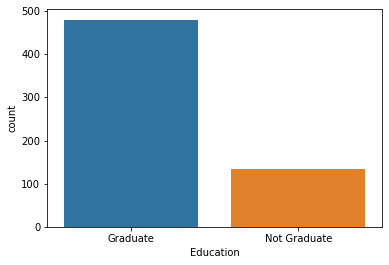

In [145]:
loan_pr['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()
sb.countplot(loan_pr['Education'])

In [ ]:
#checking the property area distribution in the data set

# Most of them are from Urban  or Semiurban Area

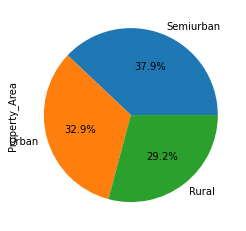

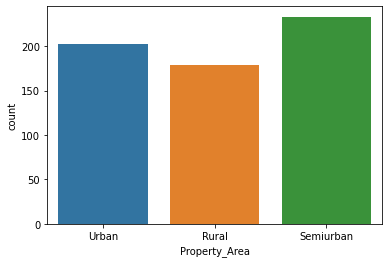

In [146]:
loan_pr['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()
sb.countplot(loan_pr['Property_Area'])
plt.show()

In [ ]:
#checking the apporaval rate of loan acccording to gender

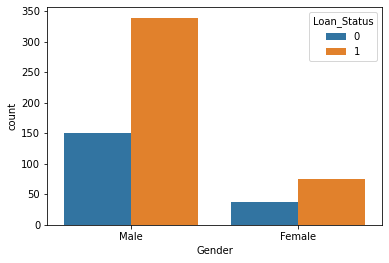

In [147]:
sb.countplot(loan_pr['Gender'],hue=loan_pr['Loan_Status'])
plt.show()

In [ ]:
#seeing the numbers to find the approaval percentage later

In [148]:
pd.crosstab(loan_pr['Gender'],loan_pr['Loan_Status'],margins=True)

Loan_Status,0,1,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [ ]:
#checking the approval rate

#Although Female Applicants are much less, does not mean that their Loans are less likely to be approved.

In [149]:
print('Approaval rate of Loans of Male Applicants',np.round(339/489,2))
print('Approaval rate of Loans of Female Applicants',np.round(75/112,2))

Approaval rate of Loans of Male Applicants 0.69
Approaval rate of Loans of Female Applicants 0.67


In [ ]:
# checking the apporaval rate of loan acccording to marital status

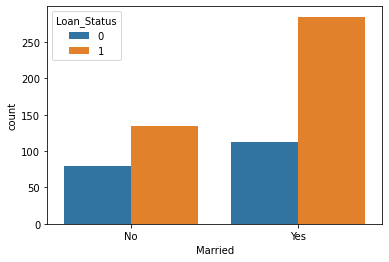

In [150]:
sb.countplot(loan_pr['Married'],hue=loan_pr['Loan_Status'])
plt.show()

In [ ]:
#determing the numbers to find the rate later 

In [151]:
pd.crosstab(loan_pr['Married'],loan_pr['Loan_Status'],margins=True)

Loan_Status,0,1,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


In [ ]:
# finding and printing  the approval data for the marital status 

##Loans of Married Applicants are more likely to be approved

In [152]:
print('Approaval rate of Loans of Married Applicants',np.round(285/398,2))
print('Approaval rate of Loans of Non-Married Applicants',np.round(134/213,2))

Approaval rate of Loans of Married Applicants 0.72
Approaval rate of Loans of Non-Married Applicants 0.63


In [ ]:
# checking the apporaval rate of loan acccording to dependents 

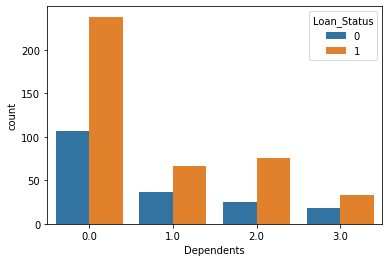

In [153]:
sb.countplot(loan_pr['Dependents'],hue=loan_pr['Loan_Status'])
plt.show()

In [ ]:
# determing the numbers for finding the dependents approval rate later 

In [154]:
pd.crosstab(loan_pr['Dependents'],loan_pr['Loan_Status'],margins=True,normalize=True)

Loan_Status,0,1,All
Dependents,,,
0.0,0.178631,0.397329,0.575960
1.0,0.060100,0.110184,0.170284
2.0,0.041736,0.126878,0.168614
3.0,0.030050,0.055092,0.085142
All,0.310518,0.689482,1.000000


In [ ]:
#Applicants with 0 Dependents have more chances of Loan Approval, while 3+ Dependents have very low chances

In [ ]:
# checking the apporaval rate of loan acccording to education

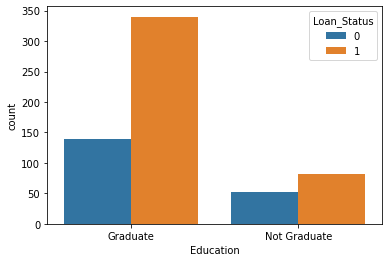

In [155]:
sb.countplot(loan_pr['Education'],hue=loan_pr['Loan_Status'])
plt.show()

In [ ]:
# determing the numbers for finding the edcational dataset  approval rate later

In [156]:
pd.crosstab(loan_pr['Education'],loan_pr['Loan_Status'],margins=True)

Loan_Status,0,1,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [157]:
print('Approval rate of Loans of Graduate Applicants',np.round(340/480,2))
print('Approval rate of Loans of Not Graduate Applicants',np.round(82/134,2))

Approaval rate of Loans of Graduate Applicants 0.71
Approaval rate of Loans of Not Graduate Applicants 0.61


In [ ]:
# Loans of Graduate Applicants are more likely to get approved

In [ ]:
# checking the apporaval rate of loan acccording to credit history

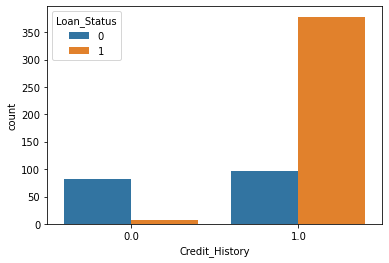

In [158]:
sb.countplot(loan_pr['Credit_History'],hue=loan_pr['Loan_Status'])
plt.show()

In [159]:
pd.crosstab(loan_pr['Credit_History'],loan_pr['Loan_Status'],margins=True)

Loan_Status,0,1,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [160]:
print('Approaval rate of Loans for Applicants who do not have credit history',np.round(7/89,2))
print('Approaval rate of Loans for Applicants who have credit history ',np.round(378/475,2))

Approaval rate of Loans for Applicants who do not have credit history 0.08
Approaval rate of Loans for Applicants who have credit history  0.8


In [ ]:
## determing the numbers for finding the credit history dataset  approval rate later
# as we can see people having credit histroy are far mire likely to get approved

In [ ]:
# checking the apporaval rate of loan acccording to property area 

# then we again determined the numbers for it so we can use it later

# as we will see people from semi urban area have more chance to get loan approved

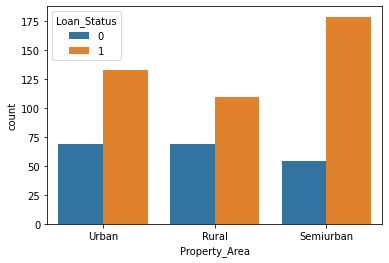

In [161]:
sb.countplot(loan_pr['Property_Area'],hue=loan_pr['Loan_Status'])
plt.show()

In [162]:
pd.crosstab(loan_pr['Property_Area'],loan_pr['Loan_Status'],margins=True)

Loan_Status,0,1,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [163]:
print('Approaval rate for Rural Area',np.round(110/179,2))
print('Approaval rate for Semiurban Area',np.round(179/233,2))
print('Approaval rate for  from Urban Area',np.round(133/202,2))

Approaval rate for Rural Area 0.61
Approaval rate for Semiurban Area 0.77
Approaval rate for  from Urban Area 0.66


In [ ]:
# checking the apporaval rate of loan acccording to applicants income  

# then we again determined the numbers for it so we can use it later

#as in the graph we will expect people with average income to get appoved more but 
# when seen in bar plot its can be seen as nothing much can be decided 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

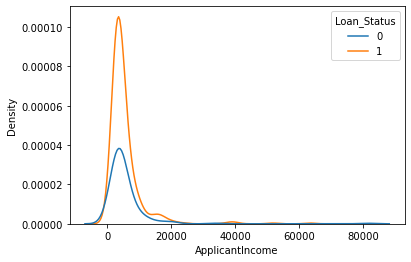

In [164]:
sb.kdeplot('ApplicantIncome',hue='Loan_Status',data=loan_pr)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

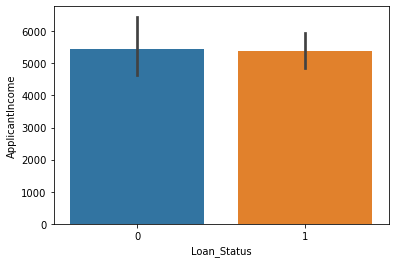

In [165]:
sb.barplot('Loan_Status','ApplicantIncome',data=loan_pr)

In [ ]:
# checking the apporaval rate of loan acccording to coapplicants income  

# then we again determined the numbers for it so we can use it later

#as in the graph we will expect people with  coaaplicant having average income to get appoved more but 
# when seen in bar plot its can be seen as nothing much can be decided 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

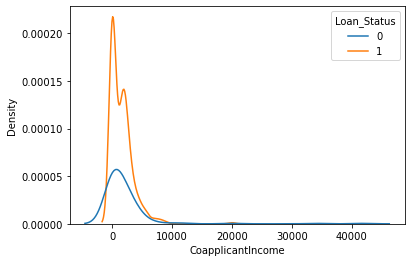

In [166]:
sb.kdeplot('CoapplicantIncome',hue='Loan_Status',data=loan_pr)

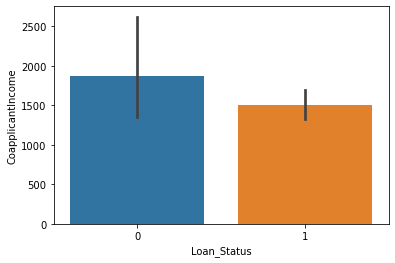

In [167]:
sb.barplot('Loan_Status','CoapplicantIncome',data=loan_pr)
plt.show()

In [ ]:
#  checking the apporaval rate of loan acccording to loan amount 

# then we again determined the numbers for it so we can use it later

#as in the graph we will expect people with more income   to get appoved more but 
# when seen in bar plot its can be seen as nothing much can be decided 

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

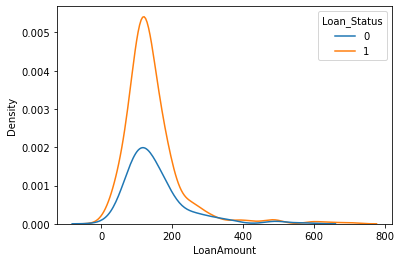

In [168]:
sb.kdeplot('LoanAmount',hue='Loan_Status',data=loan_pr)

In [ ]:
#checking for Outliners  ( some data points that can cause measurement error )

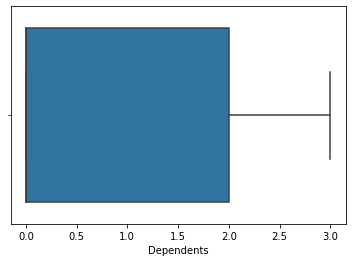

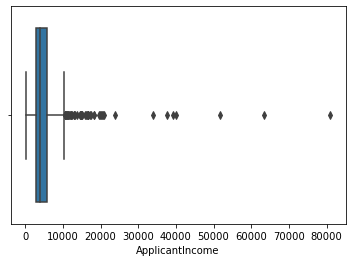

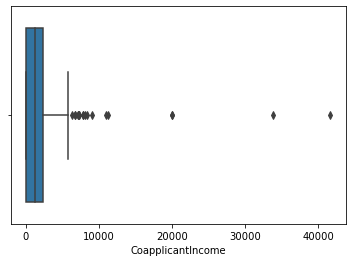

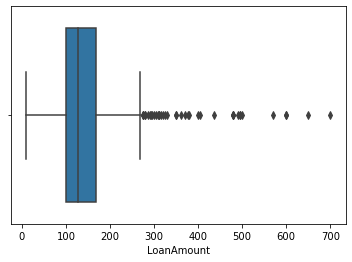

In [169]:
for i in loan_pr[num]:
    x=1
    axes=plt.subplots(x)
    sb.boxplot(loan_pr[i],ax=axes[x])
    x=x+1

In [ ]:
# as we can see from above plots ther are a lot of signifcant outliners

In [170]:
#Multivariate Analysis (data which have multiple variables )

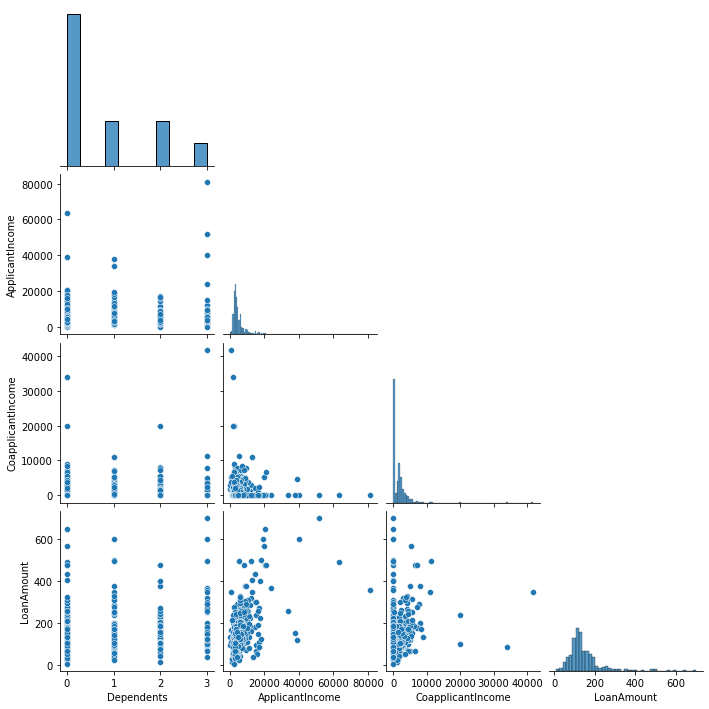

In [171]:
sb.pairplot(loan_pr[num],corner=True)

In [ ]:
#observing all the varaibles/data in a heatmap 

# as we can see there is nor speacial relationship between variables 

<AxesSubplot:>

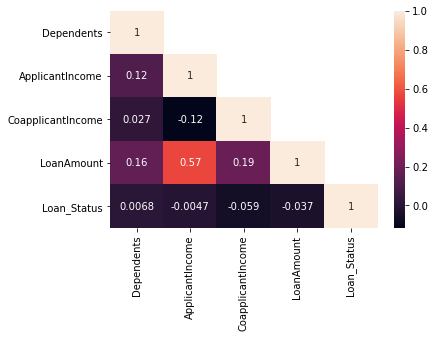

In [172]:
sb.heatmap(loan_pr.corr(),annot=True,mask=np.triu(loan_pr.corr(),+1))

In [ ]:
# we need to treat the null values before train and tesing our model

In [173]:
cat_cols=['Gender','Married','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']

In [174]:
con_col=num

In [175]:
loan_pr['Gender']=loan_pr['Gender'].fillna(loan_pr['Gender'].mode()[0])
loan_pr['Married']=loan_pr['Married'].fillna(loan_pr['Married'].mode()[0])
loan_pr['Dependents']=loan_pr['Dependents'].fillna(loan_pr['Dependents'].mode()[0])
loan_pr['Self_Employed']=loan_pr['Self_Employed'].fillna(loan_pr['Self_Employed'].mode()[0])
loan_pr['LoanAmount']=loan_pr['LoanAmount'].fillna(loan_pr['LoanAmount'].median())
loan_pr['Loan_Amount_Term']=loan_pr['Loan_Amount_Term'].fillna(loan_pr['Loan_Amount_Term'].median())
loan_pr.loc[(loan_pr.Credit_History.isnull())&(loan_pr.ApplicantIncome>=3859),'Credit_History']=1
loan_pr.loc[(loan_pr.Credit_History.isnull())&(loan_pr.ApplicantIncome<=3859),'Credit_History']=0

In [ ]:
#encoding and scaling the datas 

In [176]:
loan_pr = pd.get_dummies(loan_pr, columns = cat_cols, drop_first = True)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
loan_pr[con_col] = scaler.fit_transform(loan_pr[con_col])
print("The  data are")
loan_pr.head()

The  data are


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_Term_36.0,...,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,-0.737806,0.072991,-0.554487,-0.211241,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0.253470,-0.134412,-0.038732,-0.211241,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,-0.737806,-0.393747,-0.554487,-0.948996,1,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,1
3,-0.737806,-0.462062,0.251980,-0.306435,1,1,1,1,0,0,...,0,0,0,0,0,1,0,1,0,1
4,-0.737806,0.097728,-0.554487,-0.056551,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
# droping loan status from column 

# spliting the data in x will be other predefined inputs and outputs whereas in y we will have loan staus which our model will predict

In [177]:
X=loan_pr.drop('Loan_Status',axis=1)
Y=loan_pr[['Loan_Status']]

In [ ]:
# we will train and test the splits

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,stratify=Y)

In [ ]:
# it times to evalute our model in this case i will be using random forest classifer and logistic regression 

#random forest classifier is a classification method where the eastimator fits a number of tree classifier on the sample data set
# it has high accuracy rate 

In [180]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=1000,max_depth=7,max_features='auto',min_samples_split=10,min_samples_leaf=5,random_state=1)
RFC_model=RFC.fit(X_train,Y_train)
print('Accuracy Score of train  is ',RFC_model.score(X_train,Y_train))
Y_train_predict_RFC=RFC_model.predict(X_train)
Y_test_predict_RFC=RFC_model.predict(X_test)
print('Accuracy Score of test is ',RFC_model.score(X_test,Y_test)) 

Accuracy Score of train  is  0.8135198135198135
Accuracy Score of test is  0.7351351351351352


In [ ]:
# #we traint eh classification model and prediction bith accuracing as you can see the predefined input/output (train's accuracy is .81 ie 81%
  # whereas test accucary is .73 ie 73 % which is good )

In [182]:
print("Confusion Matrix")
cm_test=metrics.confusion_matrix(Y_test, Y_test_predict_RFC)
cm_test

Confusion Matrix


array([[ 20,  38],
       [ 11, 116]], dtype=int64)

In [ ]:
# Confusion matrix is judfes the preformance of the classification model. 

# here 20 is true posivtive means the predicted answer is accrate (answer was +ve model predicted +ve) . where 11 is false negative ie predicted answer is wrong (negative as in answer was postive but predcited negative )
# 38 is false positvie means the answer redcited is wrong and 116 is true negative means the answer was negative and model predicted negative 

In [184]:
cr_test=metrics.classification_report(Y_test, Y_test_predict_RFC)
print("Classification_report",'\n',cr_test )

Classification_report 
               precision    recall  f1-score   support

           0       0.65      0.34      0.45        58
           1       0.75      0.91      0.83       127

    accuracy                           0.74       185
   macro avg       0.70      0.63      0.64       185
weighted avg       0.72      0.74      0.71       185



In [ ]:
# classification report shows the overall report of the classificaltion model here in case our model (random forest regression)

In [185]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(solver='newton-cg',max_iter=10000)
LR_Model=LR.fit(X_train,Y_train)
print('Accuracy Score is ',LR_Model.score(X_train,Y_train))
Y_train_predict_LR=LR_Model.predict(X_train)
Y_test_predict_LR=LR_Model.predict(X_test)
print('Accuracy Score is ',LR_Model.score(X_test,Y_test))

Accuracy Score is  0.8065268065268065
Accuracy Score is  0.7297297297297297


In [186]:
cm_lr_test=metrics.confusion_matrix(Y_test, Y_test_predict_LR)
print("Classification_report",'\n',cm_lr_test )

Classification_report 
 [[ 20  38]
 [ 12 115]]


In [ ]:
#for sample we are ussing logistic regression to compare the model with random forest classifier 

In [188]:
cr_lr_test=metrics.classification_report(Y_test, Y_test_predict_LR)
print("Classification_report",'\n',cr_lr_test )

Classification_report 
               precision    recall  f1-score   support

           0       0.62      0.34      0.44        58
           1       0.75      0.91      0.82       127

    accuracy                           0.73       185
   macro avg       0.69      0.63      0.63       185
weighted avg       0.71      0.73      0.70       185



In [ ]:
#classification report of logistic regression model 

In [ ]:
#comparing both the models you can see our random forest regression model is more accurate then logistic model  